- bussiness cae
- basic checks
- domain analysis
- eda
- preprocessing
- build all the classification, performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\HP\DataSets\WINE.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Wine: This column typically represents the class or type of wine. In the Wine dataset, it often contains numerical labels representing different classes or categories of wines.

Alcohol: The alcohol content of the wine, usually measured as a percentage of alcohol by volume (ABV).

Malic.acid: The amount of malic acid present in the wine, which contributes to its tartness or acidity.

Ash: The ash content of the wine, representing the mineral content left after combustion. It's a measure of the wine's inorganic 
compounds.

Acl: This column might refer to the acidity level (Acl) of the wine, often measured as titratable acidity or pH.

Mg: The magnesium content in the wine, which can affect its taste and mouthfeel.

Phenols: Total phenolic content in the wine, including various compounds such as tannins and flavonoids. Phenols contribute to the wine's color, flavor, and antioxidant properties.

Flavanoids: The amount of flavonoids in the wine, a type of phenolic compound that contributes to color, flavor, and health benefits.

Nonflavanoid.phenols: Phenolic compounds in the wine that are not flavonoids, which also contribute to its overall phenolic profile.

Proanth: Proanthocyanidins content in the wine, which are a subgroup of flavonoids known for their antioxidant properties.

Color.int: The color intensity of the wine, which can be influenced by factors like grape variety, fermentation process, and aging.

Hue: The hue or tint of the wine, indicating its color shade or tonality.

OD: Optical density (OD) at a certain wavelength, often related to color density or concentration of compounds in the wine.

Proline: The proline content in the wine, an amino acid that can influence its taste and structure.

### basic checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.shape

(178, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wine,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic.acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid.phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [6]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

### EDA

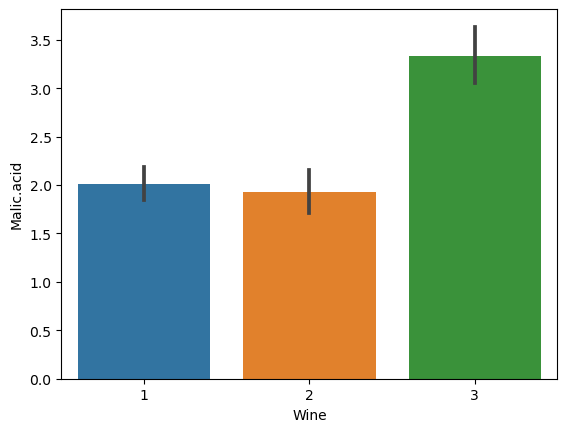

In [7]:
sns.barplot(data=df,x="Wine",y="Malic.acid")
plt.show()

In [6]:
colmn=df.columns
colmn

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

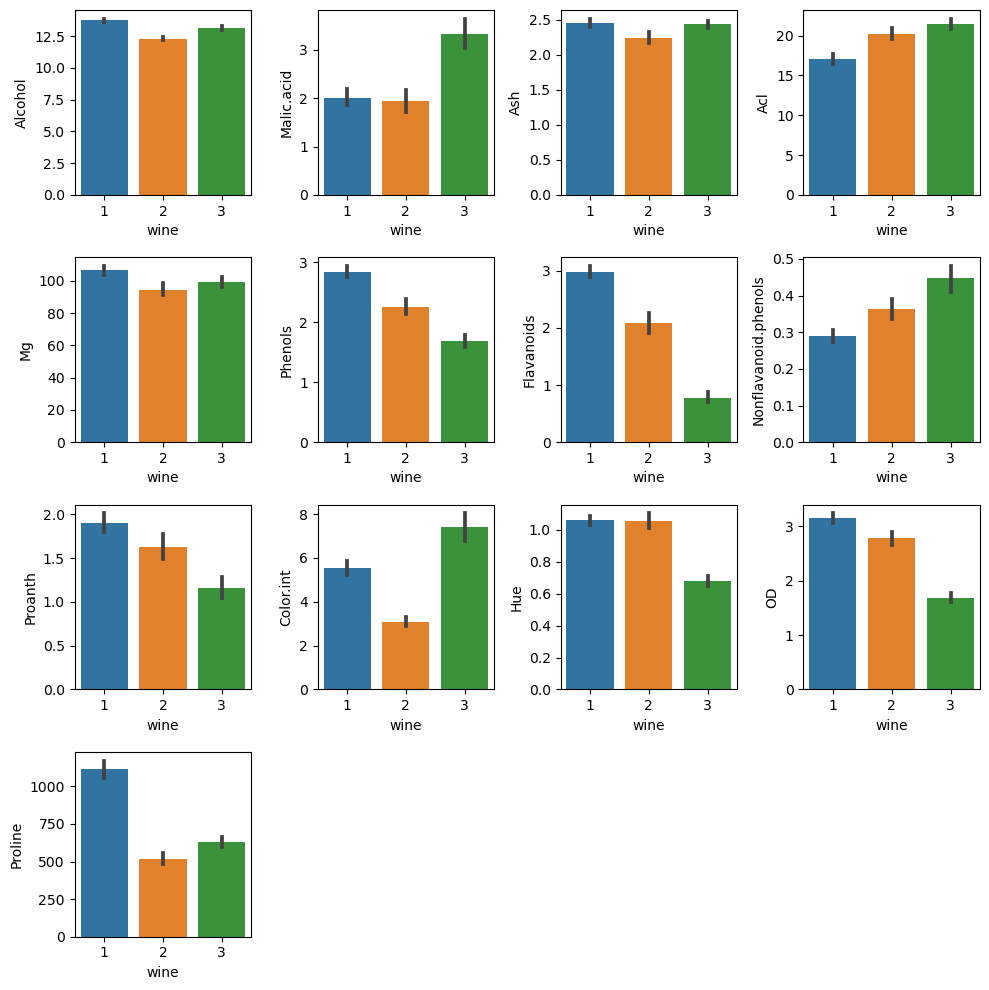

In [9]:
plt.figure(figsize=(10,10))
i=1
for cols in colmn.drop('Wine'):
    if i <14:
        ax= plt.subplot(4,4,i)
        sns.barplot(x=df["Wine"],y=df[cols])
        plt.xlabel("wine")
        plt.ylabel(cols)
    i=i+1
plt.tight_layout()

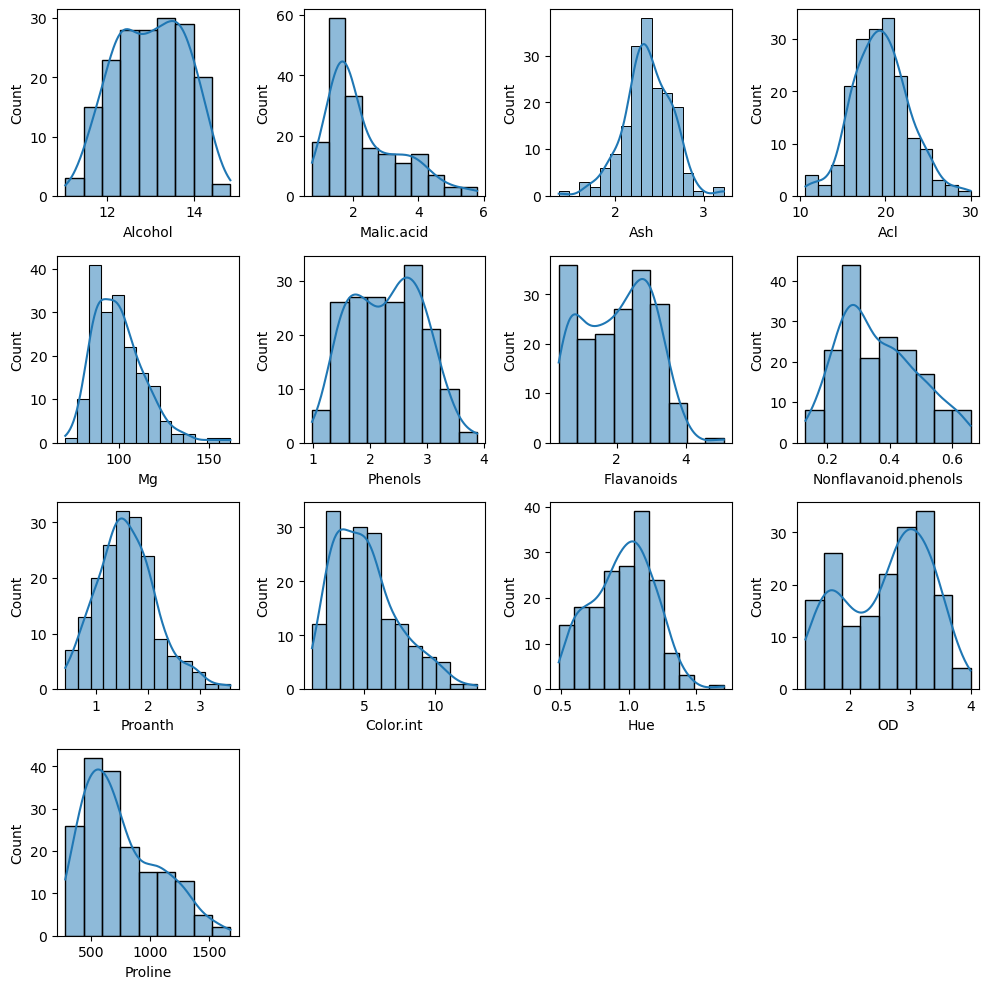

In [10]:
plt.figure(figsize=(10,10))
i=1
for cols in colmn.drop('Wine'):
    if i <14:
        ax= plt.subplot(4,4,i)
        sns.histplot(x=df[cols],kde=True)
        plt.xlabel(cols)
    i=i+1
plt.tight_layout()

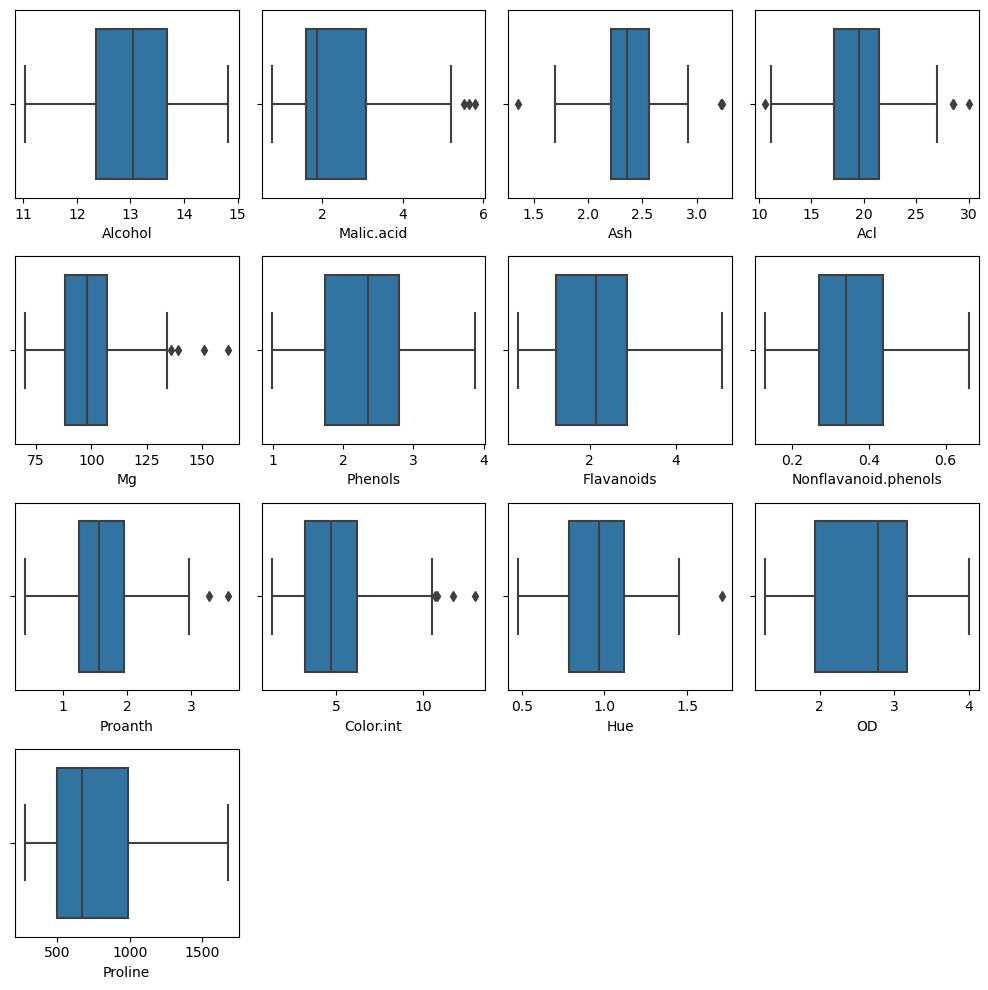

In [11]:
plt.figure(figsize=(10,10))
i=1
for cols in colmn.drop('Wine'):
    if i <14:
        ax= plt.subplot(4,4,i)
        sns.boxplot(x=df[cols])
        plt.xlabel(cols)
    i=i+1
plt.tight_layout()

In [19]:
column_outliers=df[['Malic.acid', 'Ash', 'Acl','Mg','Proanth', 'Color.int', 'Hue']]

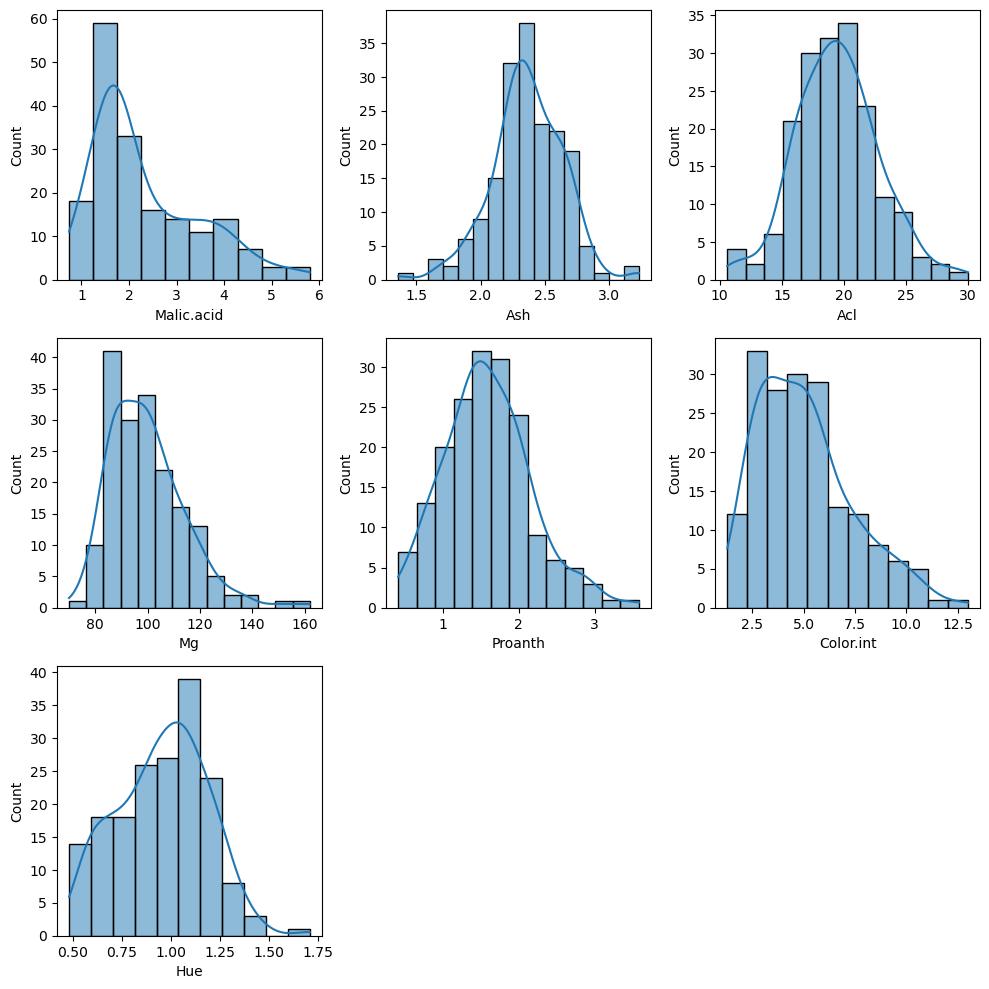

In [10]:
plt.figure(figsize=(10,10))
i=1
for cols in column_outliers:
    if i <8:
        ax= plt.subplot(3,3,i)
        sns.histplot(x=df[cols],kde=True)
        plt.xlabel(cols)
    i=i+1
plt.tight_layout()

In [20]:
Q1=column_outliers.quantile(0.25)
Q3=column_outliers.quantile(0.75)

In [21]:
Q1

Malic.acid     1.6025
Ash            2.2100
Acl           17.2000
Mg            88.0000
Proanth        1.2500
Color.int      3.2200
Hue            0.7825
Name: 0.25, dtype: float64

In [22]:
IQR=Q3-Q1
IQR

Malic.acid     1.4800
Ash            0.3475
Acl            4.3000
Mg            19.0000
Proanth        0.7000
Color.int      2.9800
Hue            0.3375
dtype: float64

In [23]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [24]:
lower

Malic.acid    -0.61750
Ash            1.68875
Acl           10.75000
Mg            59.50000
Proanth        0.20000
Color.int     -1.25000
Hue            0.27625
dtype: float64

In [25]:
upper

Malic.acid      5.30250
Ash             3.07875
Acl            27.95000
Mg            135.50000
Proanth         3.00000
Color.int      10.67000
Hue             1.62625
dtype: float64

In [12]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

### Data Preprocessing

In [13]:
### Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df[['Alcohol','Malic.acid','Ash','Acl','Mg','Phenols','Flavanoids','Proanth','Color.int', 'Hue','OD','Proline']]= sc.fit_transform(df[['Alcohol','Malic.acid','Ash','Acl','Mg','Phenols','Flavanoids','Proanth','Color.int', 'Hue','OD','Proline']])

In [14]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.28,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.26,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.30,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.24,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.39,0.444795,0.259386,0.455285,0.608059,0.325963


<AxesSubplot:>

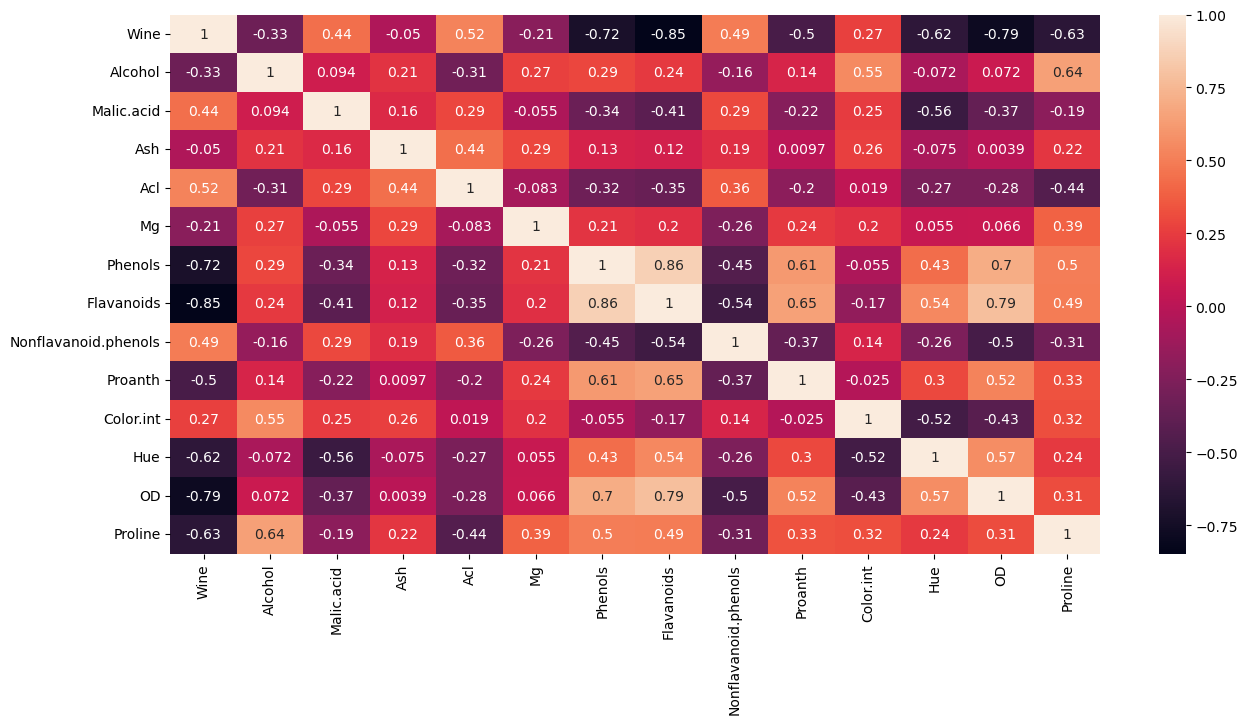

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Wine', ylabel='Proline'>

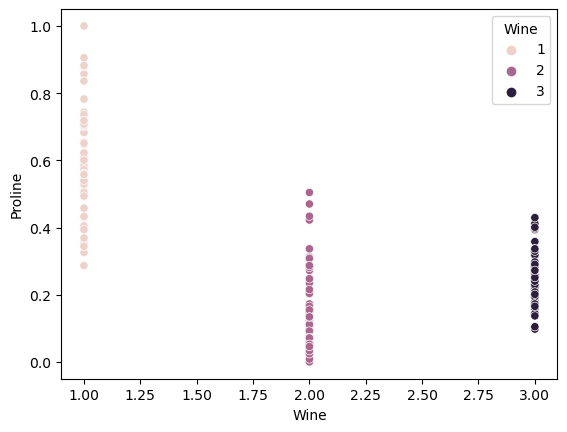

In [16]:
sns.scatterplot(data=df,x="Wine",y="Proline",hue='Wine')

<AxesSubplot:xlabel='Wine', ylabel='count'>

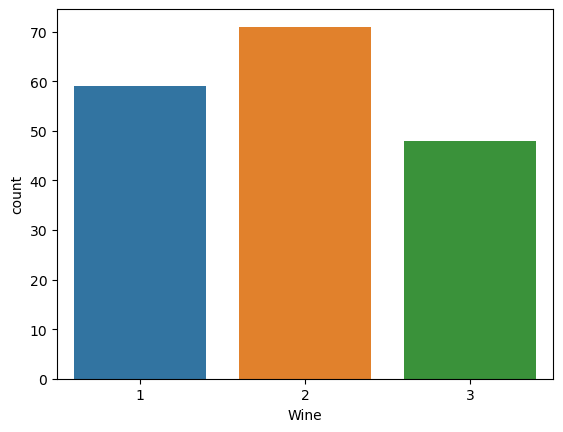

In [17]:
sns.countplot(data=df,x="Wine")

### model creation

In [18]:
x=df.drop("Wine",axis=1)
y=df.Wine

In [19]:
x

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.28,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.26,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.30,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.24,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.39,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.52,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.43,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.43,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.53,0.331230,0.684300,0.097561,0.128205,0.400856


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [22]:
y_test.shape

(54,)

In [23]:
y_train.shape

(124,)

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(x_test)

In [26]:
y_pred

array([1, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 3,
       2, 1, 1, 1, 2, 3, 2, 1, 3, 2], dtype=int64)

In [27]:
y_pred_prob=lr.predict_proba(x_test)

In [28]:
y_pred_prob

array([[0.63380627, 0.34418429, 0.02200944],
       [0.657375  , 0.31455449, 0.02807051],
       [0.05813554, 0.03538636, 0.9064781 ],
       [0.10638844, 0.71745339, 0.17615817],
       [0.06056728, 0.04899325, 0.89043947],
       [0.05654533, 0.91031048, 0.03314419],
       [0.03599199, 0.02147711, 0.94253091],
       [0.03243504, 0.21210976, 0.7554552 ],
       [0.56896069, 0.35220044, 0.07883888],
       [0.69022473, 0.23065661, 0.07911866],
       [0.03352009, 0.86206142, 0.10441849],
       [0.06691351, 0.88969654, 0.04338995],
       [0.78710844, 0.19219207, 0.02069949],
       [0.09012411, 0.87643969, 0.0334362 ],
       [0.07658587, 0.68239036, 0.24102377],
       [0.01641353, 0.07529222, 0.90829424],
       [0.85633533, 0.10805266, 0.03561201],
       [0.04211519, 0.18396147, 0.77392333],
       [0.76844461, 0.20614155, 0.02541384],
       [0.06903104, 0.91295885, 0.01801011],
       [0.76862453, 0.20540603, 0.02596944],
       [0.04996099, 0.91106189, 0.03897712],
       [0.

In [38]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 1, 1, 3, 2, 2, 3, 3, 2, 1, 3, 2,
       3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2,
       1, 1, 2, 3, 2, 3, 1, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1,
       1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 3, 1,
       3, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int64)

## model evaluation

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

In [31]:
cm=confusion_matrix(y_test,y_pred) 
print(cm)

[[18  0  0]
 [ 1 22  0]
 [ 0  0 13]]


In [32]:
recall=recall_score(y_test,y_pred, average='micro') #how many dibetic pepole are correctly predicted
recall

0.9814814814814815

In [33]:
f1_score=f1_score(y_test,y_pred,average="micro")
f1_score

0.9814814814814815

In [40]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [43]:
y_pred_svc=model.predict(x_test)
y_pred_svc

array([2, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 3,
       2, 1, 1, 1, 2, 3, 2, 1, 3, 2], dtype=int64)

In [44]:
y_pred_train_svc=model.predict(x_train)
y_pred_train_svc

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 1, 1, 3, 2, 2, 3, 3, 2, 1, 3, 2,
       3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2,
       1, 1, 2, 3, 2, 3, 1, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1,
       1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 3, 1,
       3, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int64)

In [45]:
accuracy_score(y_pred_train_svc,y_train)

0.9919354838709677

In [46]:
accuracy_score(y_pred_svc,y_test)

1.0

### Hyperparameter Tuning

In [47]:
para_grid={"C":[1,5,10,50,60,70],
           "gamma":[0.1,0.01,0.001,0.02,0.032,0.001],
            "random_state":list(range(1,20))}

In [48]:
from sklearn.model_selection import GridSearchCV
svc= SVC()
grid=GridSearchCV(svc,para_grid,cv=5,scoring="accuracy",verbose=2)
grid.fit(x,y)

Fitting 5 folds for each of 684 candidates, totalling 3420 fits
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END .....................C=1, gamma=0.1,

[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ....................C=1, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=1, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1, gamma=0.032, random_state=12; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=12; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=12; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=12; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=12; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=13; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=13; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=13; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=13; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=13; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=14; total time=   0.0s
[CV] END ..................C=1, gamma=0.032, random_state=14; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=1, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.02, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.032, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=15; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.032, random_state=16; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=10, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=10, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.032, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=

[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=50, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=7; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END .................C=50, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END ...................C=60, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=60, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.02, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C=60, gamma=0.02, random_state=10; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.032, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.032, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=

[CV] END ...................C=70, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=70, gamma=0.02, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.02, random_state=15; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.032, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.02, 0.032, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [49]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.01, 'random_state': 1}


In [50]:
model1 = SVC(C=5,gamma=0.01,random_state=1)
model1.fit(x_train,y_train)

SVC(C=5, gamma=0.01, random_state=1)

In [51]:
y_pred1=model1.predict(x_test)
y_pred1

array([1, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 3,
       2, 1, 1, 1, 2, 3, 2, 1, 3, 2], dtype=int64)

In [52]:
y_pred1_train=model.predict(x_train)
y_pred1_train

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 1, 1, 3, 2, 2, 3, 3, 2, 1, 3, 2,
       3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2,
       1, 1, 2, 3, 2, 3, 1, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1,
       1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 3, 1,
       3, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int64)

In [53]:
print(accuracy_score(y_pred1,y_test))

0.9814814814814815


In [54]:
print(accuracy_score(y_pred1_train,y_train))

0.9919354838709677


In [55]:
#import the algoo
from sklearn.tree import DecisionTreeClassifier

#init
model = DecisionTreeClassifier()

#train
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_test_dt=model.predict(x_test)
y_pred_test_dt

array([1, 2, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3,
       2, 1, 1, 1, 2, 3, 2, 1, 3, 2], dtype=int64)

In [57]:
y_pred_train_dt = model.predict(x_train)
y_pred_train_dt

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 1, 3, 2,
       3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2,
       1, 1, 2, 3, 2, 3, 1, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1,
       1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 3, 1,
       3, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int64)

In [58]:
accuracy_score(y_pred_test_dt,y_test)

0.9444444444444444

In [59]:
accuracy_score(y_pred_train_dt,y_train)

1.0

In [60]:
params = {
       "criterion": ("gini","entropy"),
       "splitter": ("best","random"),
       "max_depth": (list(range(1,20))),
       "min_samples_split" : [2,3,4],
       "min_samples_leaf" :(list(range(1,20)))
}

In [61]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state = 3)
grid = GridSearchCV(dt,params,scoring="accuracy",n_jobs=-1,verbose=1,cv=3)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print(f"best params: {best_params}")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
best params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [62]:
from sklearn.tree import DecisionTreeClassifier

#init
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, min_samples_leaf = 3, min_samples_split = 2, splitter = "random")

#train
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=3, splitter='random')

In [63]:
y_pred1 = model1.predict(x_test)

In [64]:
y_pred1_train_dt=model1.predict(x_train)

In [65]:
accuracy_score(y_pred1,y_test)

0.9074074074074074

In [66]:
accuracy_score(y_pred1_train_dt,y_train)

0.967741935483871

In [72]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()

model_rf.fit(x_train,y_train)


RandomForestClassifier()

In [73]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([1, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 3,
       2, 1, 1, 1, 2, 3, 2, 1, 3, 2], dtype=int64)

In [74]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # this is list comprehension where three lines of code is written in one line
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)    #model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',
                           param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [79]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split=5, min_samples_leaf= 1, max_features='sqrt', max_depth=30, bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=400)

In [81]:
y_predict_test=rf_clf2.predict(x_test)
y_predict_test

array([1, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 2,
       1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 3,
       2, 1, 1, 1, 2, 3, 2, 1, 3, 2], dtype=int64)

In [84]:
accuracy_score(y_predict_test,y_test)

0.9814814814814815

In [82]:
y_predict_train=rf_clf2.predict(x_train)
y_predict_train

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 1, 3, 2,
       3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2,
       1, 1, 2, 3, 2, 3, 1, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1,
       1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 3, 1,
       3, 2, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int64)

In [83]:
accuracy_score(y_predict_train,y_train)

1.0